# Titanic Project

by Luis Osorio

#### Goal: 
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
In the Survive feature, you must predict a 0 which indicates not survived or 1 value if the passenger survived.

### Features Description:

survival - Survival (0 = No; 1 = Yes) 

pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat (if survived)

body - Body number (if did not survive and body was recovered)

home.dest - where the passenger was headed

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
titanic = pd.read_csv('titanic.csv')
titanic.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


## Exploratory Analysis

In [64]:
titanic.shape

(1310, 14)

In [65]:
# quick info on the data 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [66]:
# check for null values 
titanic.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Since the Cabin feature has too many missing values, 1015 and we have a total of 1310 rows. I will be dropping this column since theres too many missing values to impute. Also will be dropping all the other columns with too many missing values. 

In [124]:
# drop columns with too many missing values 
# also dropped columns which may add no value to predicting the survival of the titanic 

df = titanic.drop(['cabin','body','boat','name','ticket','home.dest','embarked'],axis = 1)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500


Note: we have twoo categorical variables, in order to implement our models we will have to encode the labels in our variables. 

In [125]:
# drop duplicate rows
df = df.drop_duplicates()

In [126]:
# drop a row with many null values
df = df.drop(1309)

In [127]:
# checking the info after dropping columns and row
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1108 non-null   float64
 1   survived  1108 non-null   float64
 2   sex       1108 non-null   object 
 3   age       971 non-null    float64
 4   sibsp     1108 non-null   float64
 5   parch     1108 non-null   float64
 6   fare      1107 non-null   float64
dtypes: float64(6), object(1)
memory usage: 69.2+ KB


In [128]:
# check the amount of missing data left 
df.isna().sum()

pclass        0
survived      0
sex           0
age         137
sibsp         0
parch         0
fare          1
dtype: int64

These are the remaining missing values after cleaning majority of the data. We will come back to this issue after we split the data to prevent data leakage. 

In [129]:
# last 5 observations in the data 
df.tail()

,pclass,survived,sex,age,sibsp,parch,fare
1303,3.0,0.0,male,NaN,0.0,0.0,14.4583
1304,3.0,0.0,female,14.5,1.0,0.0,14.4542
1306,3.0,0.0,male,26.5,0.0,0.0,7.2250
1307,3.0,0.0,male,27.0,0.0,0.0,7.2250
1308,3.0,0.0,male,29.0,0.0,0.0,7.8750


In [130]:
# Statistical summary
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1108.000000,1108.000000,971.000000,1108.000000,1108.000000,1107.000000
mean,2.215704,0.420578,30.089513,0.518051,0.435018,36.827966
std,0.858270,0.493875,14.743690,0.956431,0.913772,55.163548
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,16.100000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,36.750000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


As we can see the mean for every feature varies widely, so we might want to normalize the data to set the mean for all features to 0 and the standard deviation for all columns to 1. However, we will do this after we split the data into training and testing sets to prevent data leakage.

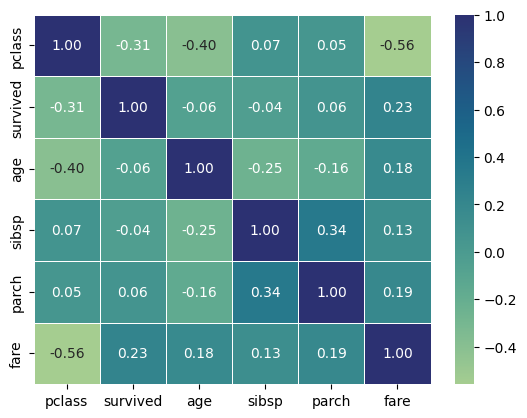

In [131]:
# check the correlations between the features 
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True, fmt = '.2f',linewidth=.6, cmap="crest")
plt.show()

## Visualizations

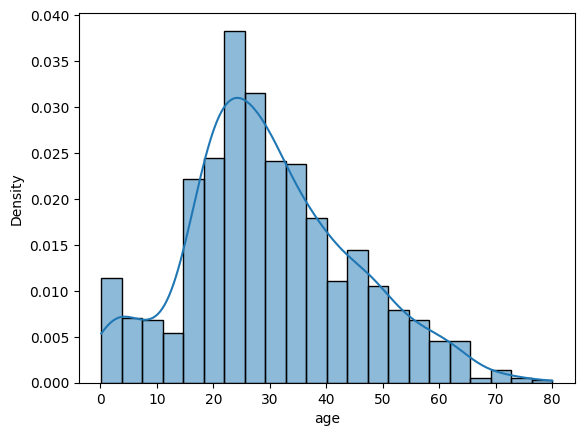

In [132]:
# desnity plot on age 
sns.histplot(x='age', data = df, kde = 'reg', alpha = 0.5, stat = 'density')
plt.show()

Majority of the passengers in the Titanic range from 20 to 40 years old. Observe how the histogram of age is a bit skewed and recall that age was a feature that had a good amount of missing data. Based on the histogram skewness, we might want to impute the missing age data using the median over the mean, it might give a slightly better accuracy. 

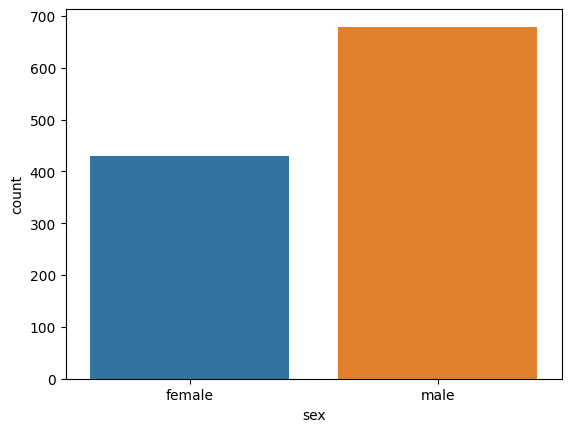

In [133]:
# checking the distribution of classes on sex 
sns.countplot(x = 'sex', data = df)
plt.xticks(ticks=[0,1], labels = ['female','male'])
plt.show()

We have an uneven distribution of males and females on the titanic. 

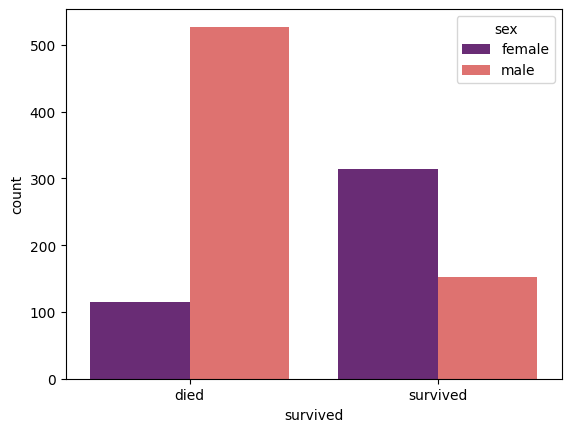

In [134]:
# check the count of survival seperated by sex
sns.countplot(x = 'survived', data = df, hue = 'sex', palette = 'magma' )
plt.xticks(ticks=[0,1], labels = ['died','survived'])
plt.show()

As we can see from the bar chart, that men were more likely to not survive the titanic compared to women were most likely to survive the titanic. 

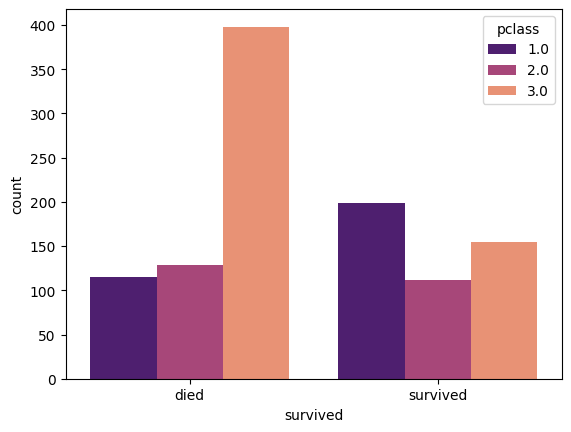

In [135]:
# check the count on survival based on P-class (passenger class)
sns.countplot(x = 'survived', data = df, hue = 'pclass', palette = 'magma' )
plt.xticks(ticks=[0,1], labels = ['died','survived'])
plt.show()

As we can see from the bar chart above, that passengers in 3rd class were most likely not to survive compared to 1st and 2nd class passengers on the titanic. Passengers who were 1st class were more likely to survive the titanic compared to 2nd class and 3rd class passenegers. 

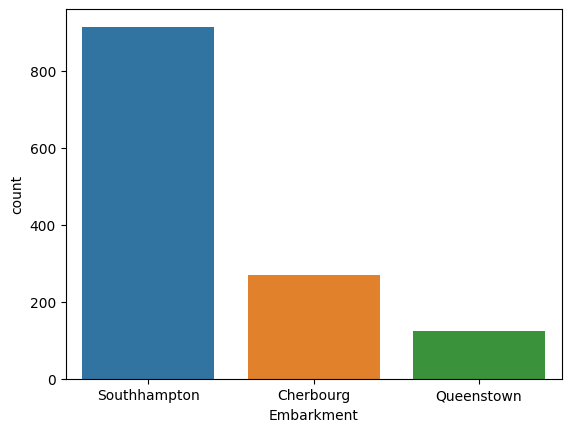

In [136]:
# check the frequency on embarked 
sns.countplot(x = 'embarked', data = titanic)
plt.xticks(ticks = [0,1,2], labels = ['Southhampton', 'Cherbourg', 'Queenstown'])
plt.xlabel('Embarkment')
plt.show()

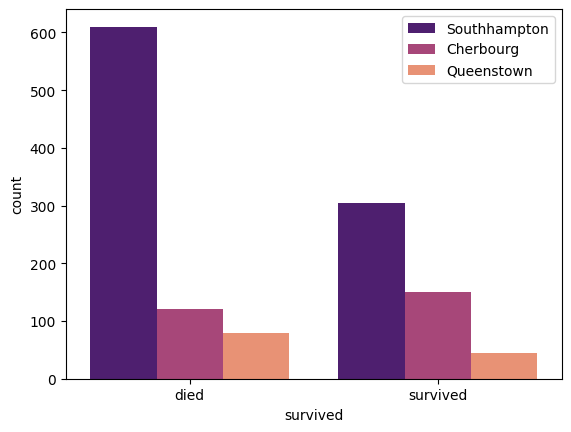

In [139]:
# check how many people from each embarkment location survived 
sns.countplot(x = 'survived', data = titanic, hue = 'embarked', palette = 'magma' )
plt.xticks(ticks=[0,1], labels = ['died','survived'])
plt.legend(labels = ['Southhampton','Cherbourg','Queenstown'])
plt.show()

In [141]:
pd.crosstab(index=titanic['embarked'], columns=titanic['survived'])

survived,0.0,1.0
embarked,,
C,120,150
Q,79,44
S,610,304


As we can see from the bar plot above that people who embarked on SouthHampton were most likely to die and survive the titanic. This is simply because majority of people on the titanic embarked on SouthHampton. Now if you observe closely the rate of survival based on embarkment, Cherboug had the highest rate of survival. Where the rate of survival is measured by the survival divided by the total amount of people embarked at that location. Cherboug had a 59.5% survival rate greater than the other two locations. However, I did not include the embarkment variable in our list of predictors for survival since embarment has no correlation with survival.

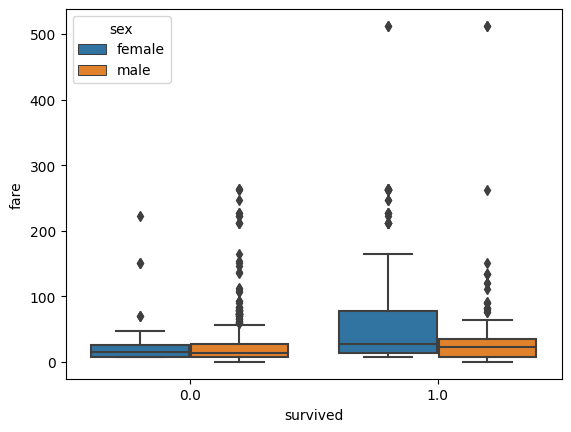

In [88]:
# box plot 
sns.boxplot(x = 'survived', y = 'fare', data = df, hue = 'sex')
plt.show()

Majority of the passenger on the titanic embarked from SouthHampton. 

In [89]:
# column names
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [90]:
# cheking the unique values of sex to see how it is encoded 
df['sex'].unique()

array(['female', 'male'], dtype=object)

## Label the categorical features

In [142]:
## label our categorical variables
# sex and embarked
from sklearn.preprocessing import LabelEncoder

# instantiate our model
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500


In [143]:
# how the encoder label the classes of sex
df['sex'].unique()

array([0, 1])

## Split the data 

In [144]:
# target variable
y = df['survived'] 

# predictors 
X = df.drop(['survived'], axis = 1)

In [145]:
# import train_test_split, cross validation, grid search
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [146]:
# split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42) 

## Logistic Regression 

In [147]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [148]:
# checking the median of age to see what strategy to use to impute 
df['age'].median()

28.0

In [149]:
# checking the mean of age to see how to impute missing age values
df['age'].mean()

30.089512564366633

In [150]:
# creating a pipeline with out Logistic Regression
pipe = Pipeline([('imp_median', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                  ('scaler', StandardScaler()) ,
                  ('log_reg', LogisticRegression(random_state = 42))])

pipe.fit(X_train,y_train)

Pipeline(steps=[('imp_median', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=42))])

In [151]:
# cross validation using 10-folds on our logistic model 

train_score = cross_val_score(pipe, X_train, y_train, cv = 10)
test_score = cross_val_score(pipe, X_test,y_test, cv = 10)
 
print(f"The logistic model mean accuracy on the training data is {train_score.mean()} with std of {train_score.std()}")

print(f"The logistic model mean accuracy on the testing data is {test_score.mean()} with std of {test_score.std()}")

The logistic model mean accuracy on the training data is 0.7448416751787539 with std of 0.038111285454753834
The logistic model mean accuracy on the testing data is 0.783596837944664 with std of 0.06719512902404541


## ADA Boost 

In [152]:
# Import our ADABoost algorithm
from sklearn.ensemble import AdaBoostClassifier

In [153]:
# store our scores for training and testing data
train_mean_sc = []

test_mean_sc = []

for i in range(1,50):
    pipe_ada = Pipeline([('imp_median', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                  ('scaler', StandardScaler()) ,
                  ('ada', AdaBoostClassifier(n_estimators=i, random_state=42))])

    pipe_ada.fit(X_train,y_train)
    
    train_score = cross_val_score(pipe_ada, X_train, y_train, cv = 10)
    test_score = cross_val_score(pipe_ada, X_test,y_test, cv = 10)
    
    train_mean_sc.append(train_score.mean())
    test_mean_sc.append(test_score.mean())
    
x = range(1,50)

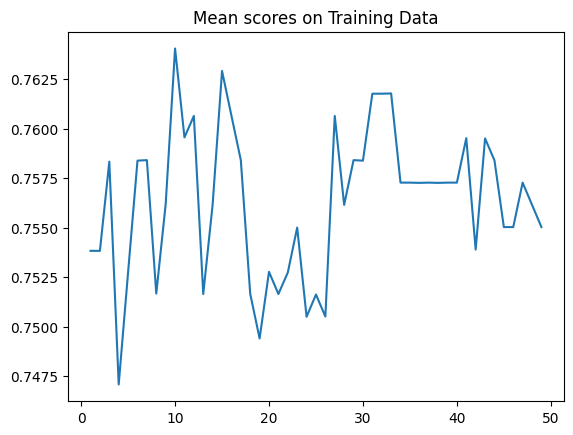

In [154]:
plt.plot(x,train_mean_sc)
plt.title('Mean scores on Training Data')
#plt.yticks(ticks = [.76,.765,.77,.775,.78,.785,.79])
plt.show()

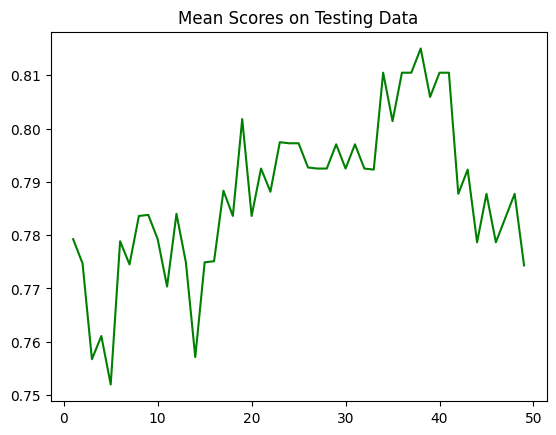

In [155]:
plt.plot(x,test_mean_sc,color = 'green')
plt.title('Mean Scores on Testing Data')
#plt.yticks(ticks = [.76,.77,.78,.79,.80,.81,.82,.83])
plt.show()

We want the model that had the highest accuracy scores on both the training data and on unseen data which is our testing data. Based off the charts above, we can conclude that the model that returns the highest accuracy on both data sets is when we set out n estimators parameter on our ADA Boost algorithm somewhere between 30 and 40. Now we check.

In [156]:
train_mean_sc[30:40]

[0.7617722165474974,
 0.7617722165474973,
 0.7617849846782431,
 0.7572778345250255,
 0.7572778345250255,
 0.7572650663942798,
 0.7572778345250255,
 0.7572650663942798,
 0.7572778345250255,
 0.7572778345250255]

In [157]:
test_mean_sc[30:40]

[0.7970355731225296,
 0.7924901185770751,
 0.792292490118577,
 0.8104743083003954,
 0.8013833992094861,
 0.8104743083003951,
 0.8104743083003951,
 0.8150197628458498,
 0.8059288537549406,
 0.8104743083003954]

The optimal number of n estimators for ADA Boost is 31. 

In [170]:
# creating pipeline for our ADA Boost model
pipe_ada = Pipeline([('imp_median', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                  ('scaler', StandardScaler()) ,
                  ('ada', AdaBoostClassifier(n_estimators=31, 
                                             random_state=42))])

pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('imp_median', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('ada', AdaBoostClassifier(n_estimators=31, random_state=42))])

In [171]:
# running cross validation using 10-folds on our ADA Boost model 

train_score = cross_val_score(pipe_ada, X_train, y_train, cv = 10)
test_score = cross_val_score(pipe_ada, X_test,y_test, cv = 10)
 
print(f"The ADA Boost model mean accuracy on the training data is {train_score.mean()} with std of {train_score.std()}")

print(f"The ADA Boost model mean accuracy on the testing data is {test_score.mean()} with std of {test_score.std()}")

The ADA Boost model mean accuracy on the training data is 0.7617722165474974 with std of 0.047203307941612864
The ADA Boost model mean accuracy on the testing data is 0.7970355731225296 with std of 0.07172061739152409


In [177]:
# instead of looking for the most optimal n-estimators
# we do grid search to find the most optimal n-estimator, algorithm, learning-rate

# Define the hyperparameters to search over
hyperparameters = {
    'ada__learning_rate': [0.5,0.25,0.1, 0.01, 0.001],
    'ada__algorithm': ['SAMME','SAMME.R'],
    'ada__random_state':[42],
    'ada__n_estimators':[10,20,30,40,50,60,70]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = pipe_ada, 
                           param_grid = hyperparameters, 
                           cv=10,
                           refit = 'rmse')

In [178]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imp_median',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(n_estimators=31,
                                                           random_state=42))]),
             param_grid={'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.5, 0.25, 0.1, 0.01, 0.001],
                         'ada__n_estimators': [10, 20, 30, 40, 50, 60, 70],
                         'ada__random_state': [42]},
             refit='rmse')

In [179]:
# print the model parameters with the best score
print(grid_search.best_params_)

{'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 0.1, 'ada__n_estimators': 70, 'ada__random_state': 42}


In [180]:
# print the model best score
print(grid_search.best_score_)

0.7617339121552604


In [181]:
pipe_ada2 = Pipeline([('imp_median', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                  ('scaler', StandardScaler()) ,
                  ('ada', AdaBoostClassifier(learning_rate = 0.1,
                                             n_estimators=70, 
                                             algorithm = 'SAMME.R',
                                             random_state=42))])

pipe_ada.fit(X_train,y_train)

train_score = cross_val_score(pipe_ada2, X_train, y_train, cv = 10)
test_score = cross_val_score(pipe_ada2, X_test,y_test, cv = 10)
 
print(f"The ADA Boost model mean accuracy on the training data is {train_score.mean()} with std of {train_score.std()}")

print(f"The ADA Boost model mean accuracy on the testing data is {test_score.mean()} with std of {test_score.std()}")

The ADA Boost model mean accuracy on the training data is 0.7617339121552604 with std of 0.037326443917633914
The ADA Boost model mean accuracy on the testing data is 0.7786561264822134 with std of 0.06387405588158271


## XGBoost 

In [4]:
import xgboost as xgb

In [55]:
# creating our pipeline for our XGBoost model 
pipe_xgb = Pipeline([('imp_median', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                  ('scaler', StandardScaler()) ,
                  ('xgb', xgb.XGBClassifier(max_depth=3, learning_rate=0.1, objective='binary:logistic', 
                                            eval_metric='rmse'))])

pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('imp_median', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='rmse',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [56]:
# running cross validation using 10-folds on XGBoost model
train_score = cross_val_score(pipe_xgb, X_train, y_train, cv = 10)
test_score = cross_val_score(pipe_xgb, X_test,y_test, cv = 10)

print(f"The XGBoost model mean accuracy on the training data is {train_score.mean()} with std of {train_score.std()}")

print(f"The XGBoost model mean accuracy on the testing data is {test_score.mean()} with std of {test_score.std()}")

The XGBoost model mean accuracy on the training data is 0.7719611848825332 with std of 0.02239342315464121
The XGBoost model mean accuracy on the testing data is 0.7790513833992094 with std of 0.08286172644538371


In [57]:
# Define the hyperparameters to search over
hyperparameters = {
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__n_estimators': [100,200,300],
    'xgb__gamma': [0, 0.05 ,0.1],
    'xgb__subsample': [0.5,0.75,1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = pipe_xgb, 
                           param_grid = hyperparameters, 
                           cv=10,
                           refit = 'rmse')

In [58]:
# run the grid search on all parameters
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imp_median',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='rmse',
                                                      feature_types=None,
                                                      gamma=N...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__gamma': [0, 0.05, 0.1],
                         'xgb__learning_rate': [0.1, 0.01, 0.001],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [100, 200, 300],
                         'xgb__subsample': [0.5, 0.75, 1.0]},
             refit='rmse')

In [59]:
# print the model parameters with the best score
print(grid_search.best_params_)

{'xgb__gamma': 0.1, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 4, 'xgb__n_estimators': 100, 'xgb__subsample': 0.75}


In [60]:
# print the model best score
print(grid_search.best_score_)

0.7912155260469868


In [61]:
# checking the validation of the best model on unseen data
pipe_xgb2 = Pipeline([('imp_median', SimpleImputer(missing_values = np.nan, strategy = 'median')),
                  ('scaler', StandardScaler()) ,
                  ('xgb', xgb.XGBClassifier(gamma = 0.1, 
                                            learning_rate = 0.01, 
                                            max_depth = 4, 
                                            n_estimators = 100, 
                                            subsample = 0.75,
                                            objective = 'binary:logistic', 
                                            eval_metric='rmse'))])

pipe_xgb2.fit(X_train,y_train)

train_score = cross_val_score(pipe_xgb2, X_train, y_train, cv = 10)
test_score = cross_val_score(pipe_xgb2, X_test,y_test, cv = 10)

print(f"The XGBoost model mean accuracy on the training data is {train_score.mean()} with std of {train_score.std()}")

print(f"The XGBoost model mean accuracy on the testing data is {test_score.mean()} with std of {test_score.std()}")

The XGBoost model mean accuracy on the training data is 0.7912155260469868 with std of 0.02754579139061333
The XGBoost model mean accuracy on the testing data is 0.7790513833992095 with std of 0.0687724319283193


In [182]:
pipe_xgb_it = Pipeline([('knn_impute',KNNImputer(n_neighbors = 10) ),
                  ('scaler', StandardScaler()) ,
                  ('xgb', xgb.XGBClassifier(max_depth=3, learning_rate=0.1, objective='binary:logistic', 
                                            eval_metric='rmse'))])

pipe_xgb_it.fit(X_train,y_train)

Pipeline(steps=[('knn_impute', KNNImputer(n_neighbors=10)),
                ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='rmse',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [183]:
train_score = cross_val_score(pipe_xgb_it, X_train, y_train, cv = 10)
test_score = cross_val_score(pipe_xgb_it, X_test,y_test, cv = 10)

print(f"The XGBoost model mean accuracy on the training data is {train_score.mean()} with std of {train_score.std()}")

print(f"The XGBoost model mean accuracy on the testing data is {test_score.mean()} with std of {test_score.std()}")

The XGBoost model mean accuracy on the training data is 0.7708248212461696 with std of 0.028049607227566154
The XGBoost model mean accuracy on the testing data is 0.8150197628458498 with std of 0.05971650544588729


## Conclusion: 

We began by first selecting the features we were going to use to predict the survival of the passengers on board. Features such as name and ticket fare were easily identified as not contributing to the survival of the passenger, so they were dropped from the dataset. We then started checking the remaining columns for missing data and created visualization to identify the best strategy to impute that missing data. Since our target variable was a binary classification problem, I tried to use the best models that related to this type of problem and used models such as Logistic regression, Ada Boost, and XGBoost. The boosting algorthims are just methods on Decisions Trees which overall do relatively good on classification problems. After conducting our models we tested our results using cross-validation which separated out training and testing data in a variety of ways to provided a more accurate measure of our models. Our best performing model that predicted survival of a passenger on the Titanic was the XGBoost model. We than ran a grid search to find the best parameters for our XGBoost algorithm. After running our model with the new set of parameters we got a mean score on the training data of 0.79, which is fairly good. The mean score of our model on unseen data (testing data) was 0.779, which ensured our model was not overfitting. Now since we observed the XGBoost algorithms seemed to be the best algorithm to predict survival we tried using outher alternatives to our pipeline such as changing how we imputed the missing data. Out of curiousity we tried the XGBoost algorithm but instead imputed the missing data using KNNImputer, which uses other features to try to find the best predictions for our missing data. The mean accuracy score on this new pipeline was 0.77 on the training data and .815 on the testing data. Our model overall showed minor bias on unseen data. 

### What could have we done better?

We could have used some better strategies to impute our missing data when it came to the age feature. Observe, how we imputed the missing data using SimpleImputer from Sklearn library, and imputed age using the median. Using the median was the best method in my opinion since the histogram on age was a bit skewed. However, we might have classified some observations incorrectly since Women and Children were most likely to survive and using median age 28, to impute the missing data, we might have replaced some women and children age as 28. Then the model might have classified them incorrectly. One way to check this is using the confusion matrix to compared False Positive and False Negatives. Now we could have used other algorithms to impute missing data, for example, KNN imputer or IterativeImputer which uses other features of the observations to give a better estimate to impute the missing data. This approach might increase our overall accuracy of the models. We could have also checked if the feature embarked also improves our accuracy scores since I did'nt include it as a predictor for our models. Another major key role is the hyperparameters to our models could significantly change our accuracy scores. When I considered my grid search for the most optimal parameters I merely scratched the surface of all the combinations to try. There might be a set of parameters that might make our models work more efficiently and give better accuracy scores than the models shown here. 